In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

C:\Users\saravanan\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.datasets import load_iris

In [3]:
ds = load_iris()

In [4]:
dir(ds)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
ds.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
ds.data.shape

(150, 4)

In [43]:
df = pd.DataFrame(ds.data,columns=ds.feature_names)

In [44]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
df.columns = ['sl','sw','pl','pw']

In [46]:
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df.drop(['pl','pw'],axis=1,inplace=True)

In [48]:
df.head()

,sl,sw
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


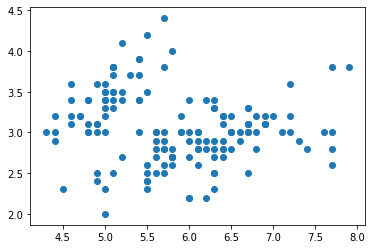

In [49]:
plt.scatter(df['sl'],df['sw'])

In [50]:
scaler = MinMaxScaler()
scaler.fit(df[['sl']])
df['sl'] = scaler.transform(df[['sl']])

In [51]:
df.head()

,sl,sw
0,0.222222,3.5
1,0.166667,3.0
2,0.111111,3.2
3,0.083333,3.1
4,0.194444,3.6


In [52]:
scaler.fit(df[['sw']])
df['sw'] = scaler.transform(df[['sw']])

In [53]:
import pandas_bokeh

In [54]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [55]:
df.plot_bokeh.scatter('sl','sw')

Figure(id='1111', ...)

In [63]:
model = KMeans(n_clusters=2)
pred = model.fit_predict(df[['sl','sw']])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [76]:
df['pred']=pred
df.head()

,sl,sw,pred
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


In [65]:
df1 = df[df.pred==0]
df2 = df[df.pred==1]

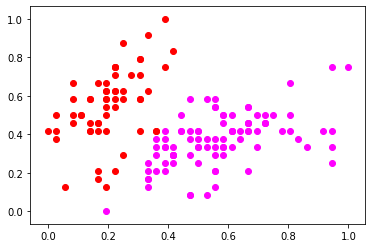

In [69]:
plt.scatter(df1.sl,df1.sw,color='red')
plt.scatter(df2.sl,df2.sw,color='magenta')

In [70]:
error = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit_predict(df[['sl','sw']])
    error.append(model.inertia_)

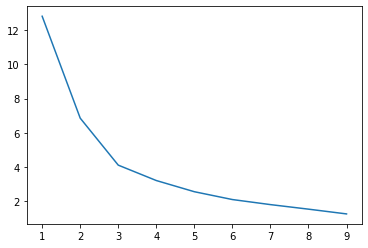

In [73]:
i=range(1,10)
plt.plot(i,error)

In [82]:
model = KMeans(n_clusters=3)
pred=model.fit_predict(df[['sl','sw']])
df.pred = pred
df1 = df[df.pred==0]
df2 = df[df.pred==1]
df3 = df[df.pred==2]

In [87]:
model.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.40483539, 0.28009259],
       [0.19897959, 0.60459184]])

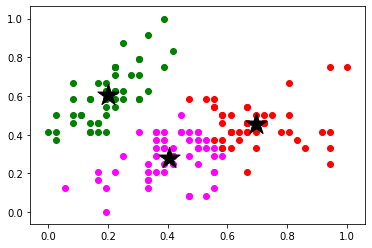

In [90]:
plt.scatter(df1.sl,df1.sw,c='red')
plt.scatter(df2.sl,df2.sw,c='magenta')
plt.scatter(df3.sl,df3.sw,c='green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='k',marker='*',s=500)